In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Load the dataset

In [61]:
# Load the dataset
data = pd.read_csv('student_data.csv')

# Data preprocessing

In [62]:
# Rename columns
data = data.rename(columns={'school': 'School', 'sex':'Sex', 'age':'Age',
                   'address':'HomeLoc','famsize':'FamSize', 'reason':'Reason', 
                    'guardian': 'Guardian','traveltime':'TravelTime','studytime':'StudyTime',
                  'failures':'Failures','schoolsup':'SchoolSup','famsup':'FamSup','paid':'Paid',
                  'activities':'Activities','nursery':'Nursery','higher':'Higher',
                   'internet':'Internet','romantic':'Romantic','famrel':'FamRel',
                   'freetime':'FreeTime','goout':'GoOut','health':'Health','absences':'Absences'})

In [63]:
# Check for null values
data.isna().sum()

School        0
Sex           0
Age           0
HomeLoc       0
FamSize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
Reason        0
Guardian      0
TravelTime    0
StudyTime     0
Failures      0
SchoolSup     0
FamSup        0
Paid          0
Activities    0
Nursery       0
Higher        0
Internet      0
Romantic      0
FamRel        0
FreeTime      0
GoOut         0
Dalc          0
Walc          0
Health        0
Absences      0
G1            0
G2            0
G3            0
dtype: int64

In [64]:
# Check for duplicates
data.loc[data.duplicated()]

,School,Sex,Age,HomeLoc,FamSize,Pstatus,Medu,Fedu,Mjob,Fjob,...,FamRel,FreeTime,GoOut,Dalc,Walc,Health,Absences,G1,G2,G3


In [65]:
# Drop duplicate rows
data = data.drop_duplicates()


# Exploratory Data Analysis (EDA) Functions

In [66]:
def plot_distributions(df):
    """
    Plots distribution of all numerical and categorical features in the dataset.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = df.select_dtypes(include=['category', 'object', 'int64']).columns
    
    # Plot numerical features
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature], kde=True, color='blue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
    
    # Plot categorical features
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=feature, palette='viridis')
        plt.title(f'Countplot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()


def plot_heatmap(df):
    """
    Plots a heatmap of the correlation matrix of numerical features in the dataset.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap of Correlation Matrix')
    plt.show()



def plot_feature_importance(df, target_column):
    """
    Plots the feature importance of the dataset using a Random Forest classifier.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    target_column (str): The name of the target column.
    """
    # Preprocess the data
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit RandomForestClassifier to find feature importance
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances_sorted = feature_importances.sort_values(ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette='viridis')
    plt.title('Feature Importance based on RandomForest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


def plot_correlation_matrix(df):
    """
    Plots the correlation matrix for all numerical features in the dataset.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    plt.figure(figsize=(12, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()


In [67]:
def plot_feature_importance(df, target_column):
    """
    Plots the feature importance of the dataset using a Random Forest classifier.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    target_column (str): The name of the target column.
    """
    # Preprocess the data
    label_encoder = LabelEncoder()
    if df[target_column].dtype == 'object':
        df[target_column] = label_encoder.fit_transform(df[target_column])
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit RandomForestClassifier to find feature importance
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances_sorted = feature_importances.sort_values(ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette='viridis')
    plt.title('Feature Importance based on RandomForest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


def plot_heatmap_matplotlib(df):
    """
    Plots a heatmap of the correlation matrix of numerical features in the dataset using matplotlib.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(corr, cmap='coolwarm')
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Heatmap of Correlation Matrix (Matplotlib)', pad=20)
    plt.show()


def plot_correlation_matrix_matplotlib(df):
    """
    Plots the correlation matrix for all numerical features in the dataset using matplotlib.
    
    Args:
    df (DataFrame): The input dataframe for analysis.
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(corr, cmap='coolwarm')
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Correlation Matrix of Numerical Features (Matplotlib)', pad=20)
    plt.show()


# Main part

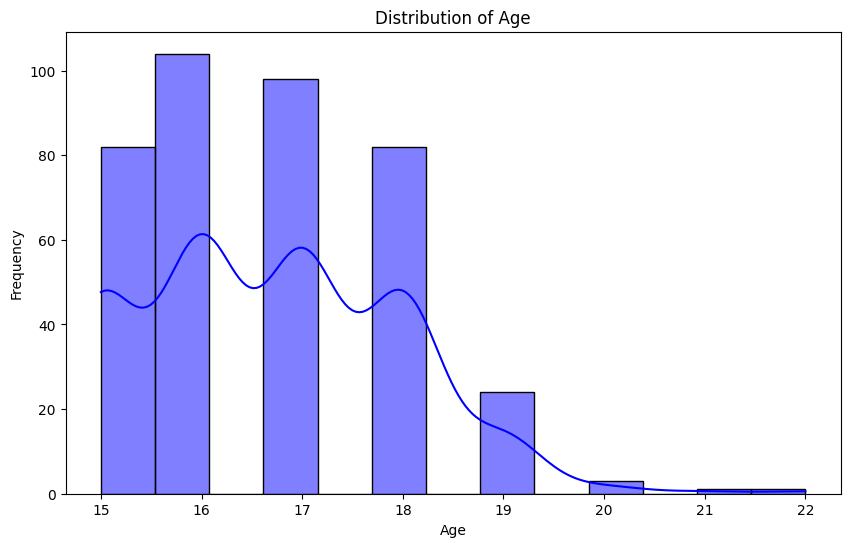

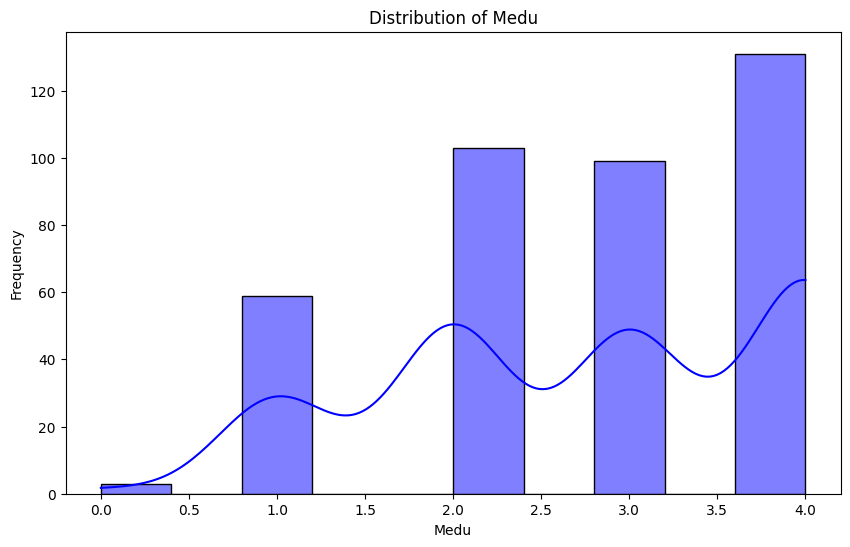

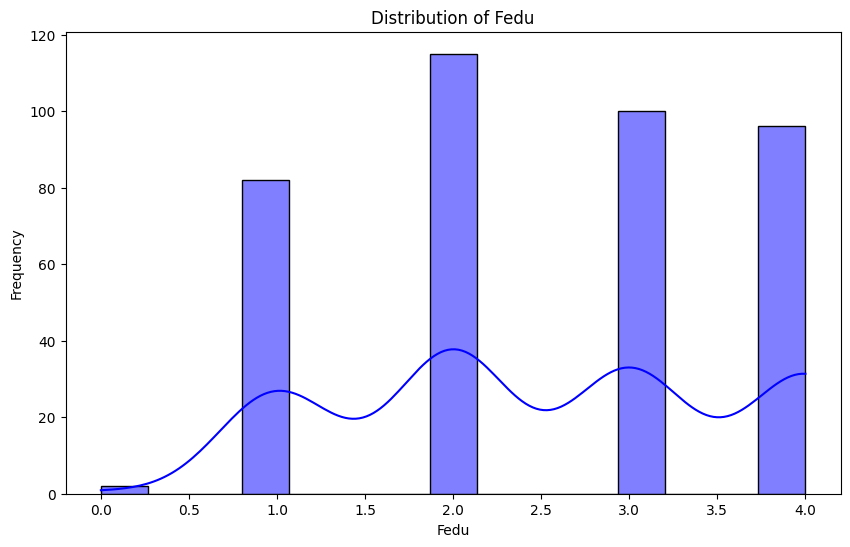

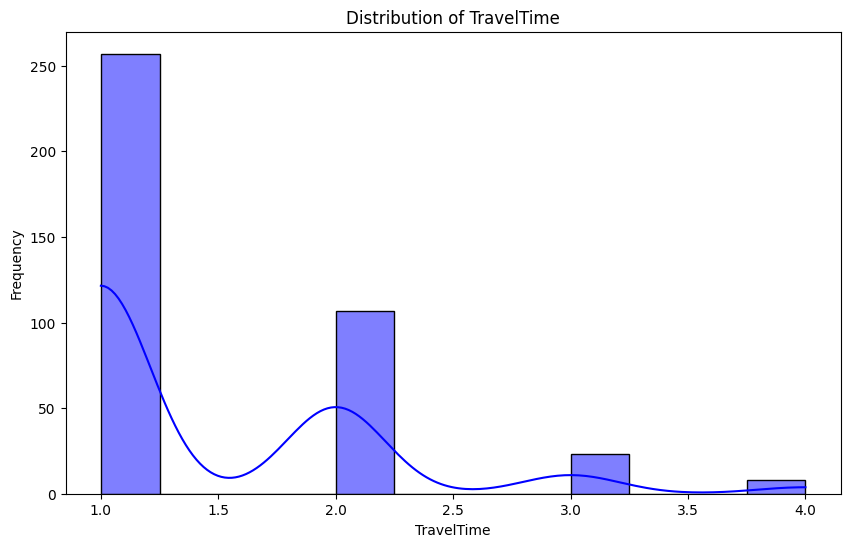

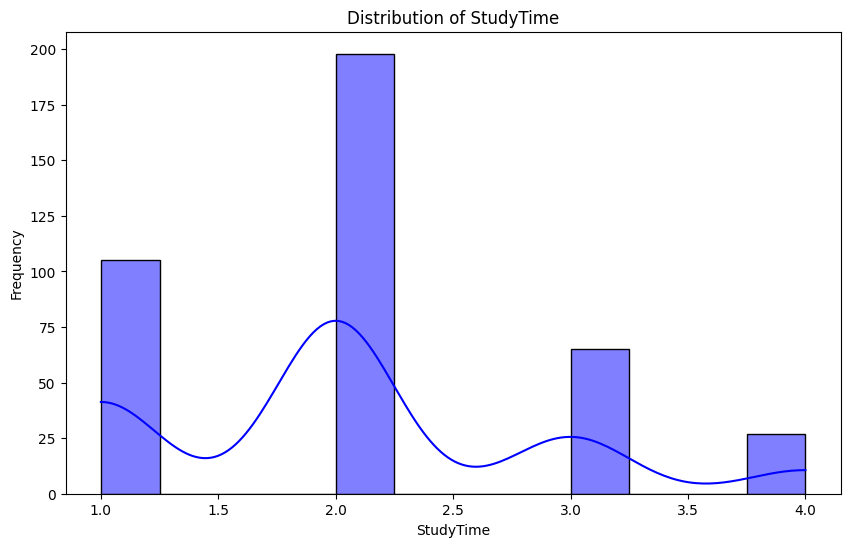

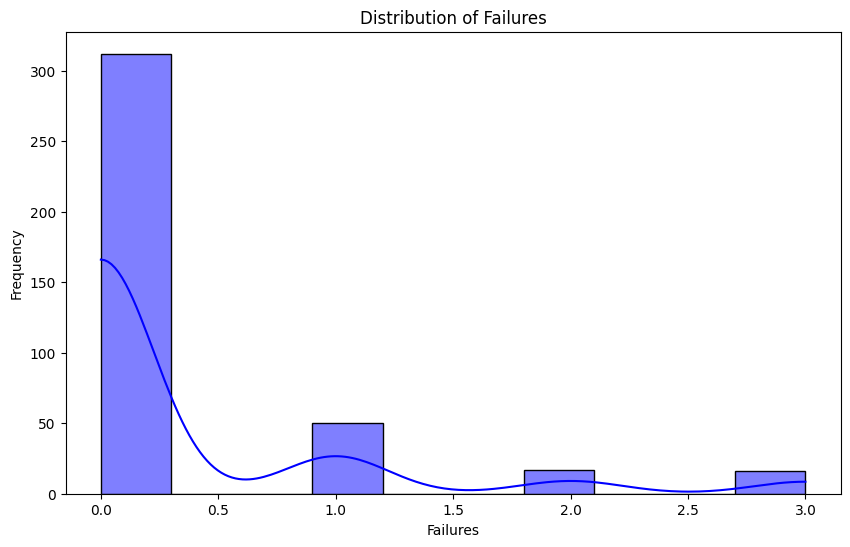

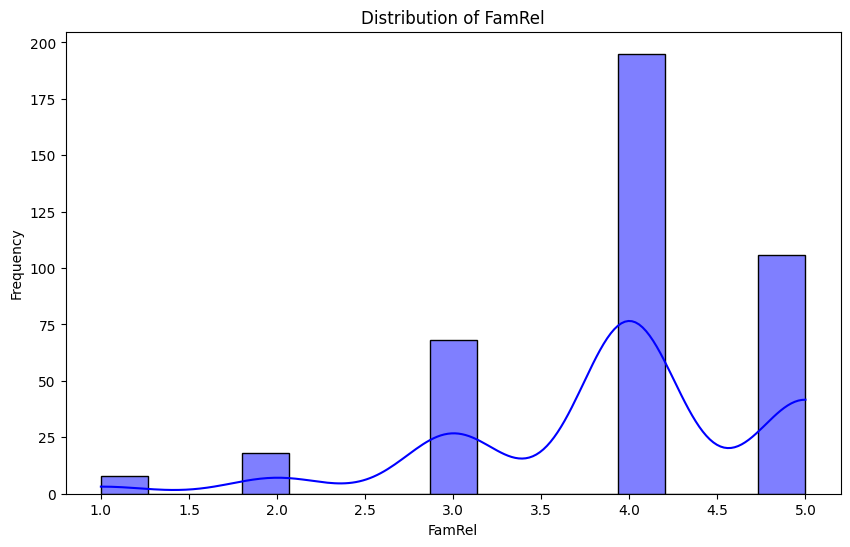

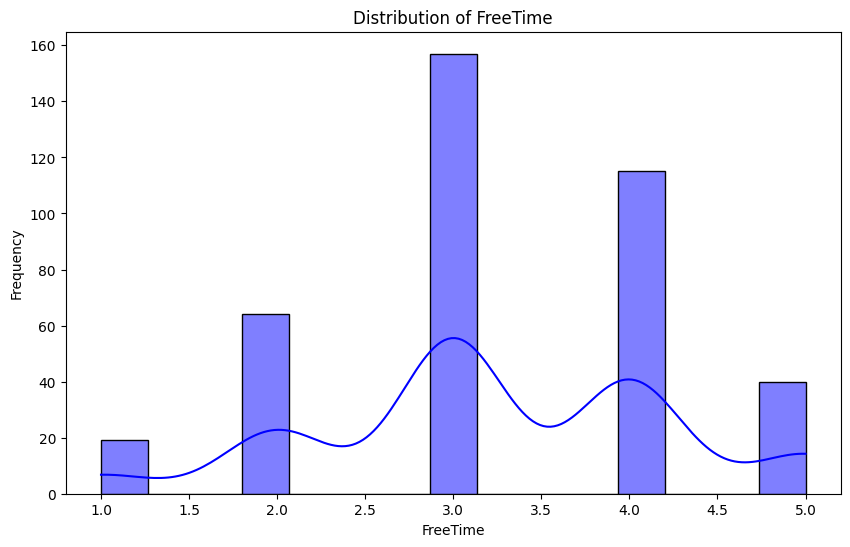

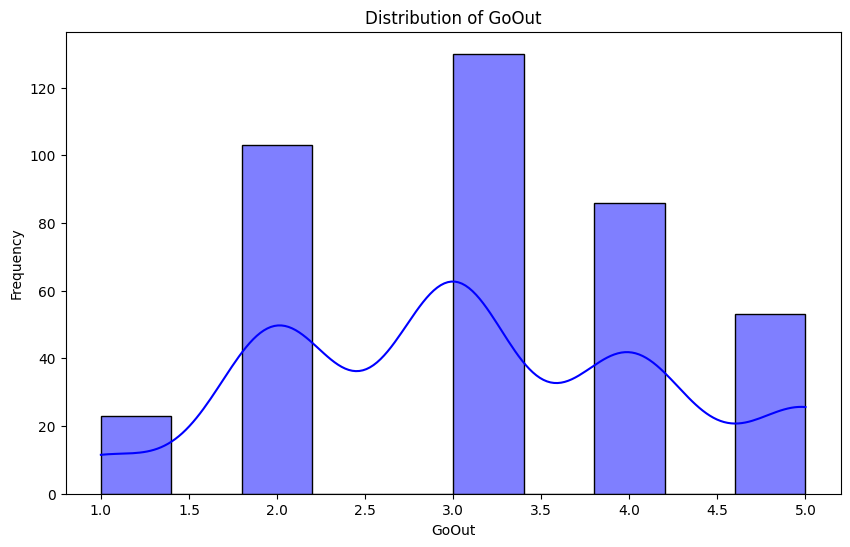

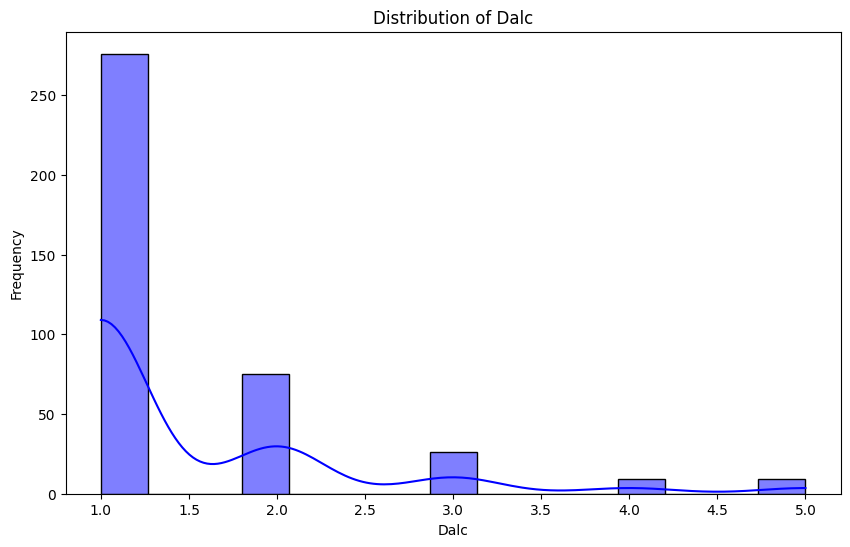

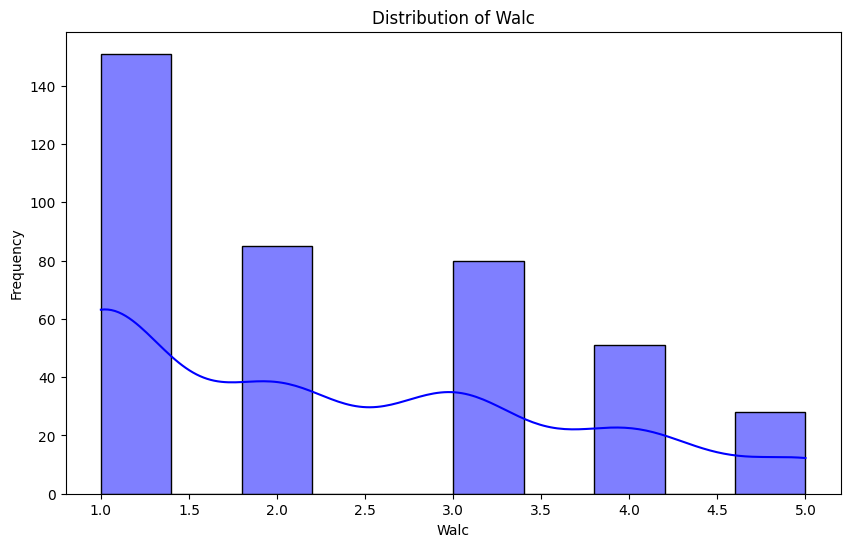

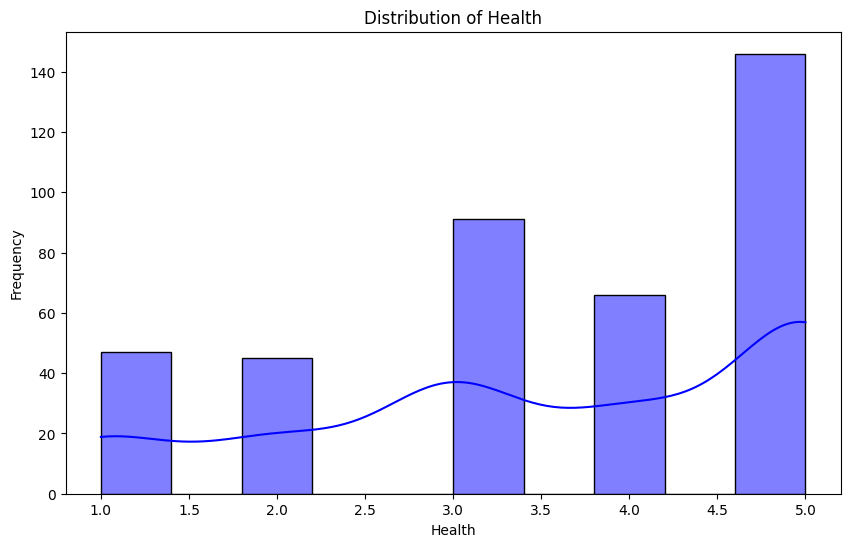

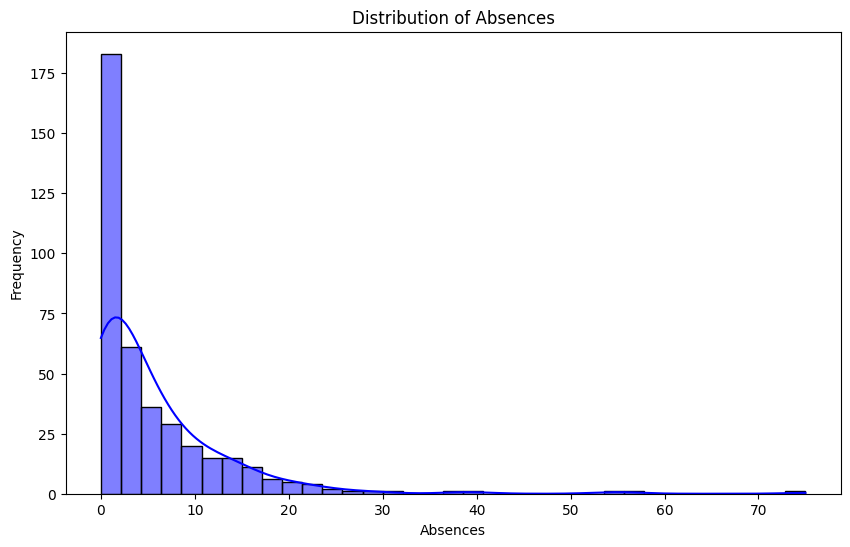

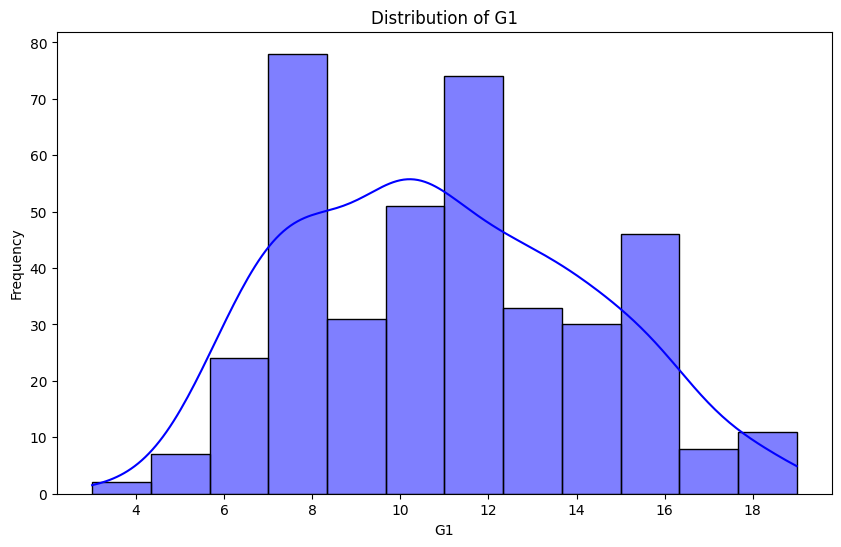

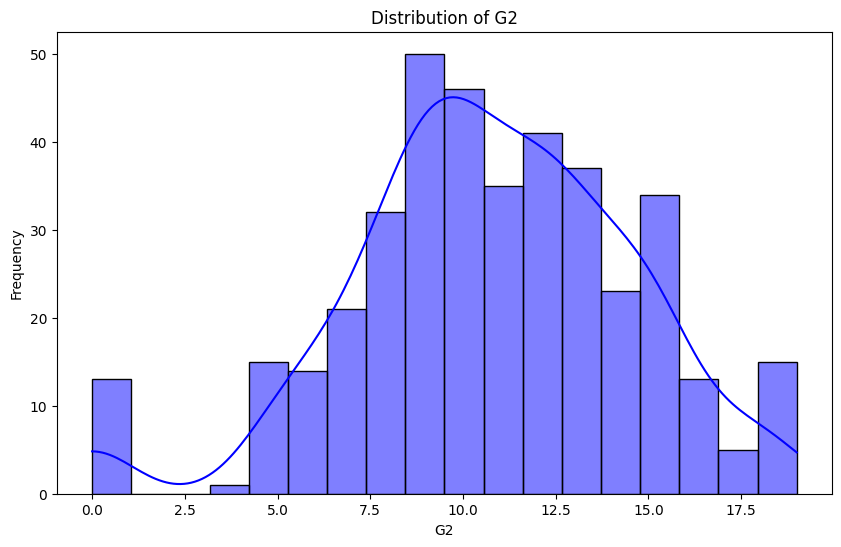

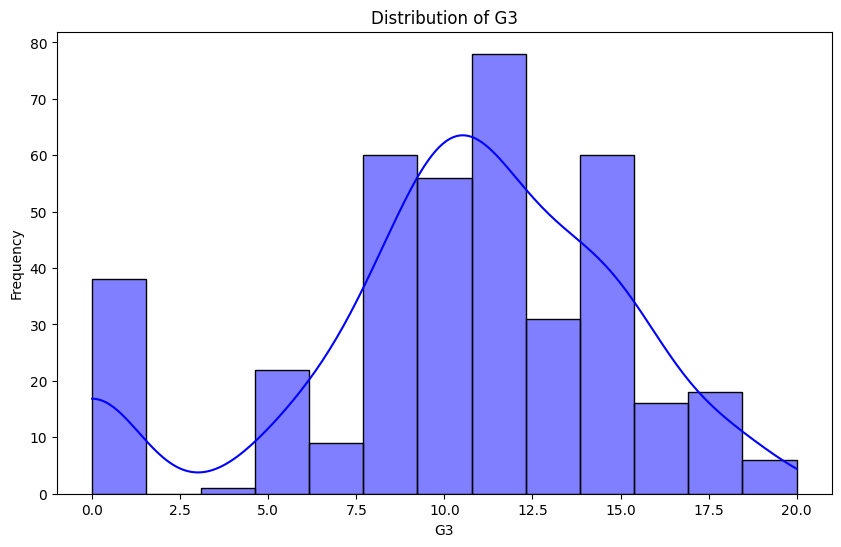

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


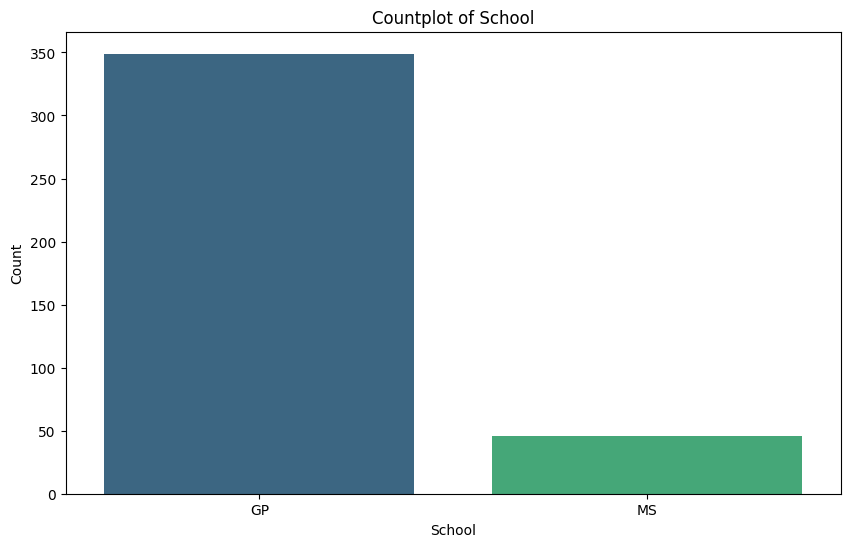

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


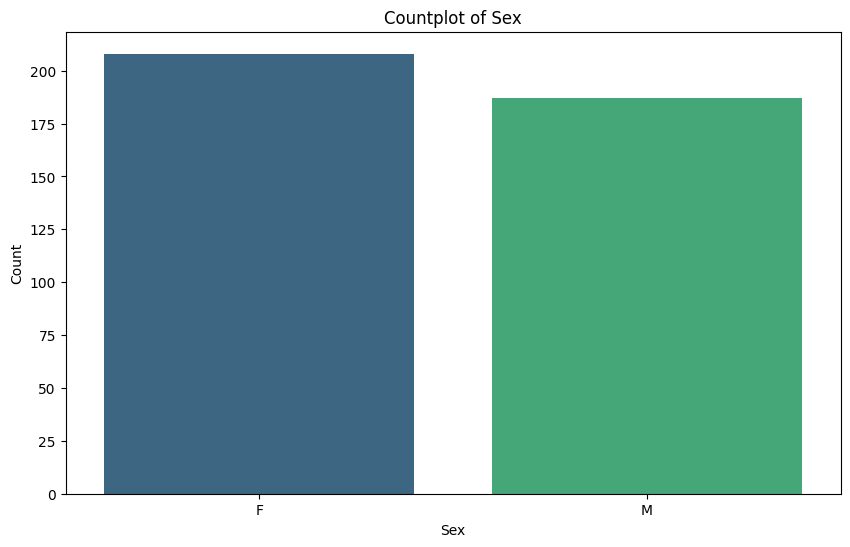

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


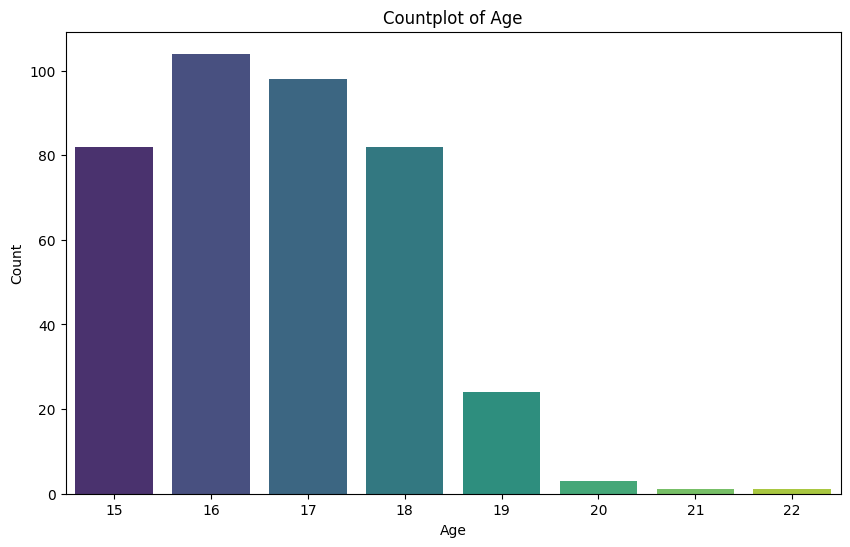

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


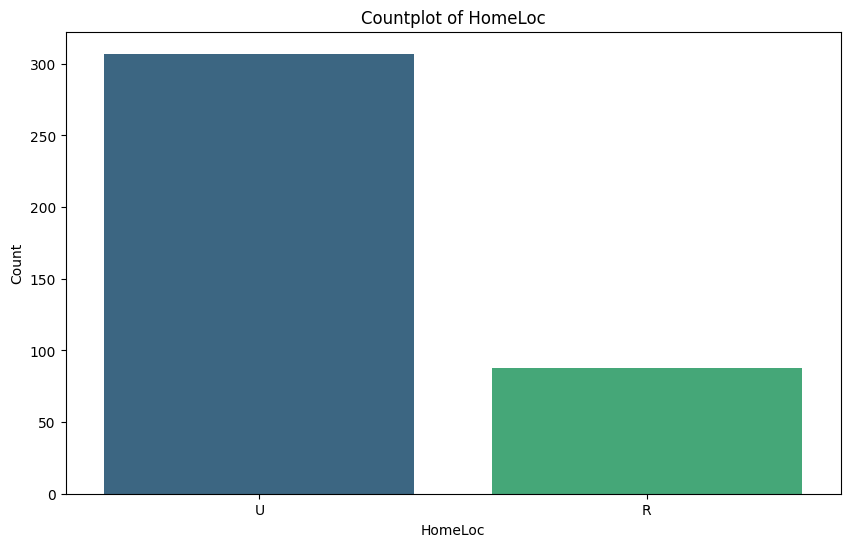

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


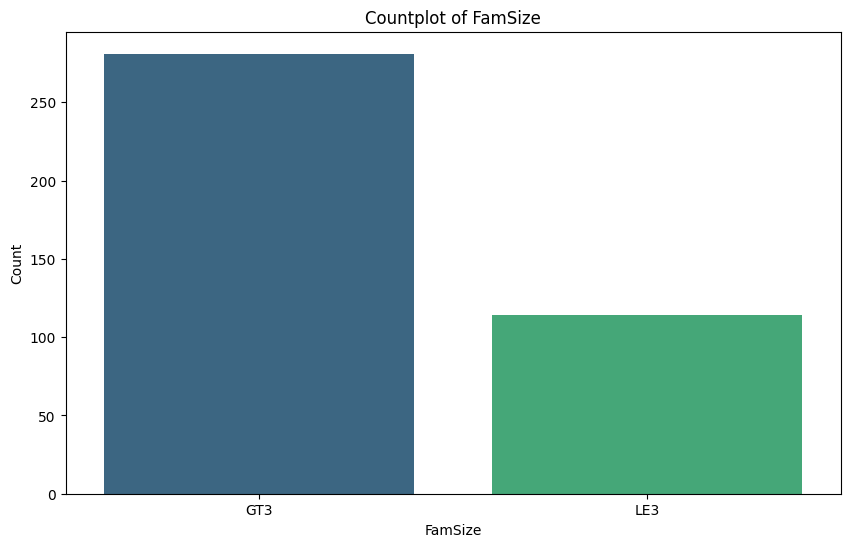

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


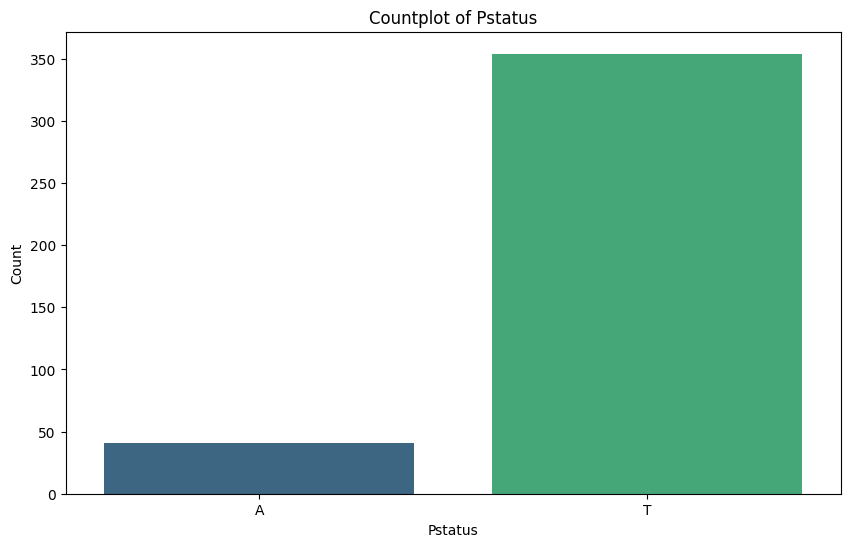

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


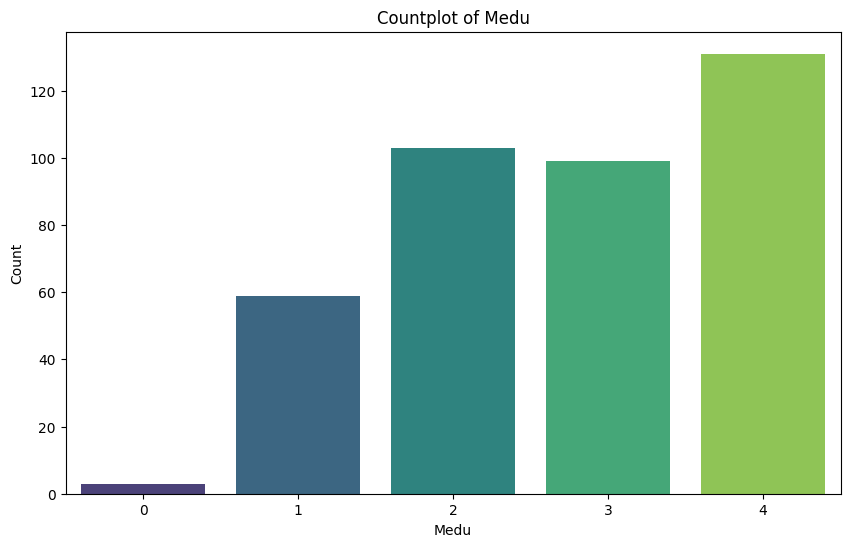

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


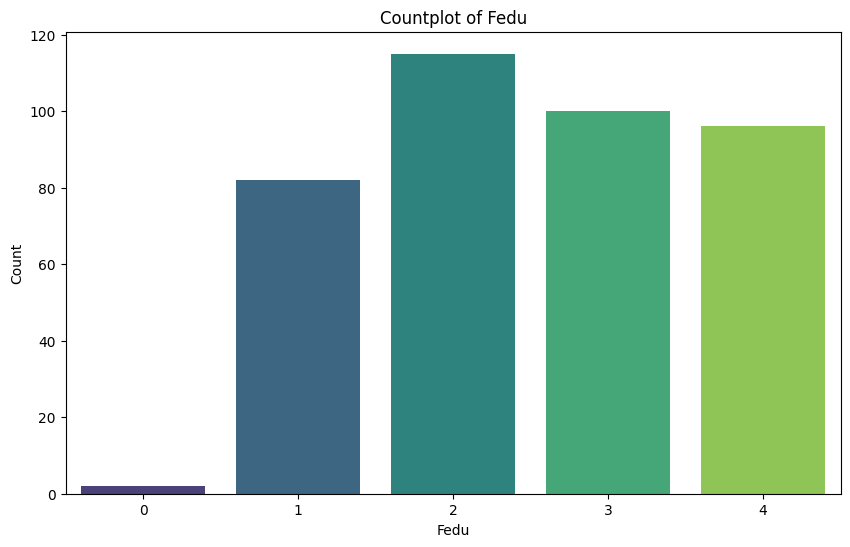

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


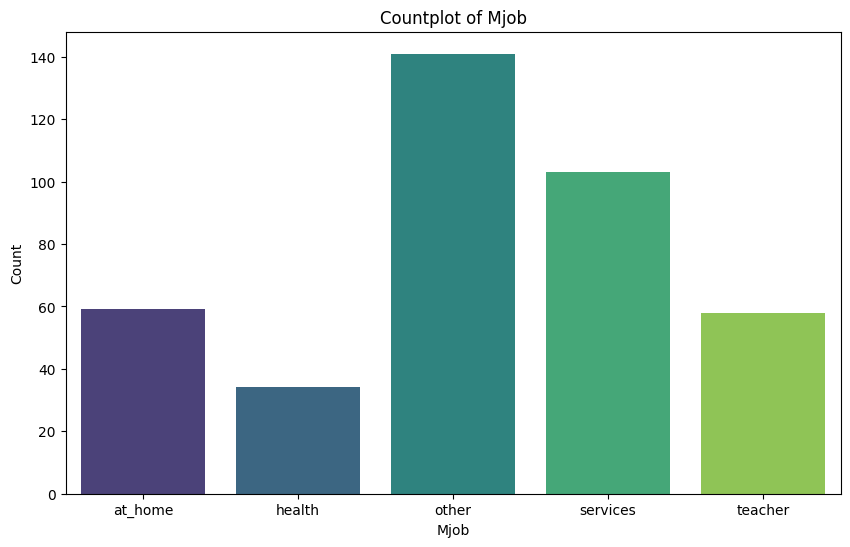

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


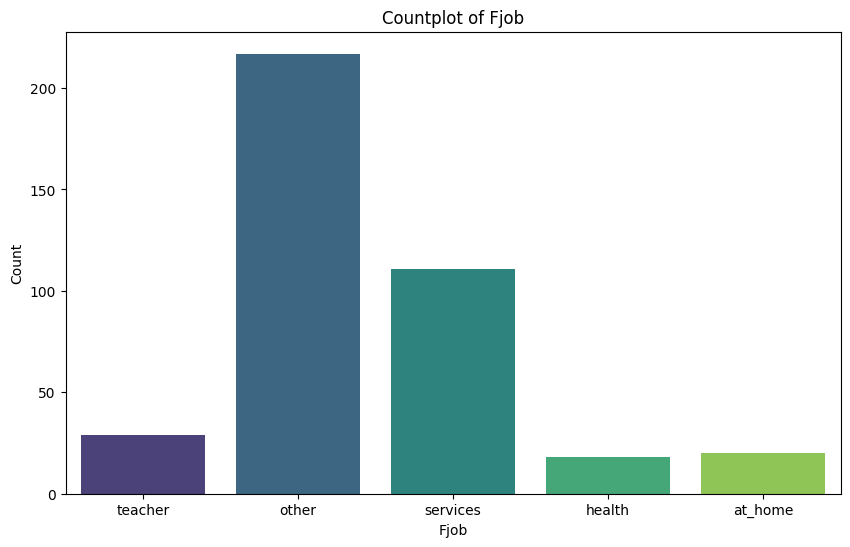

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


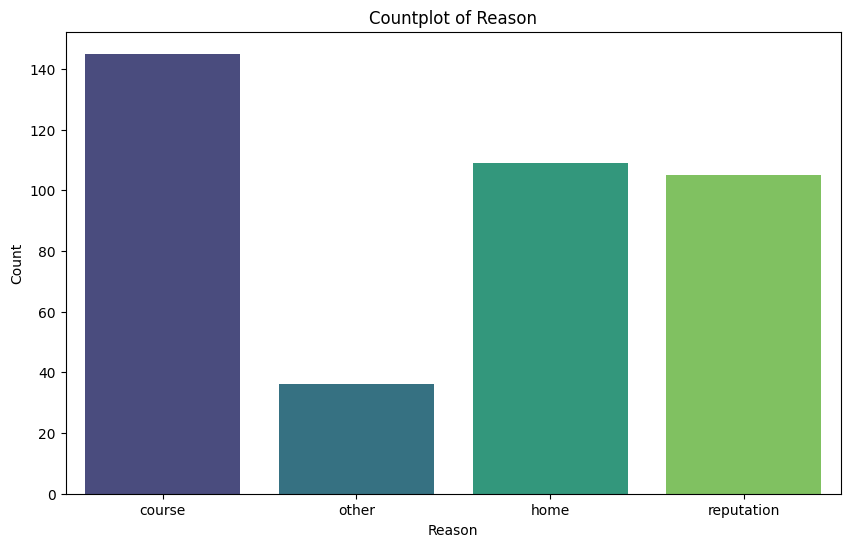

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


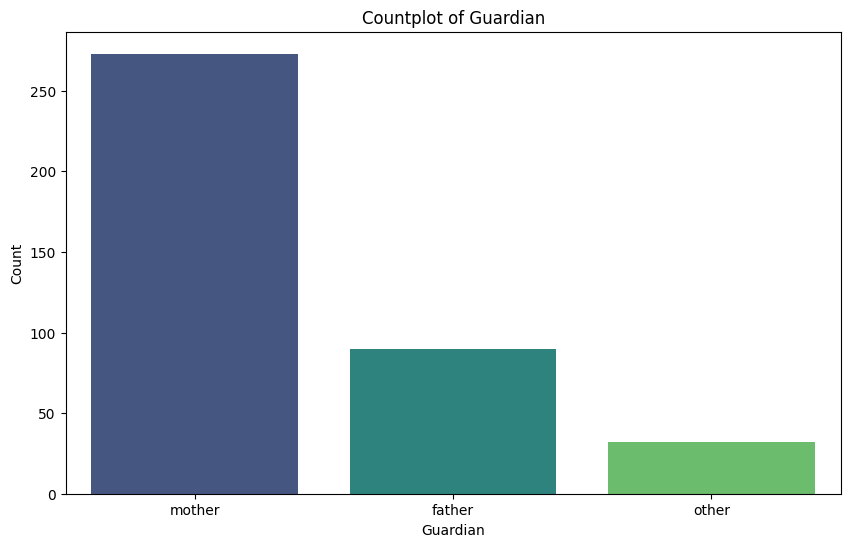

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


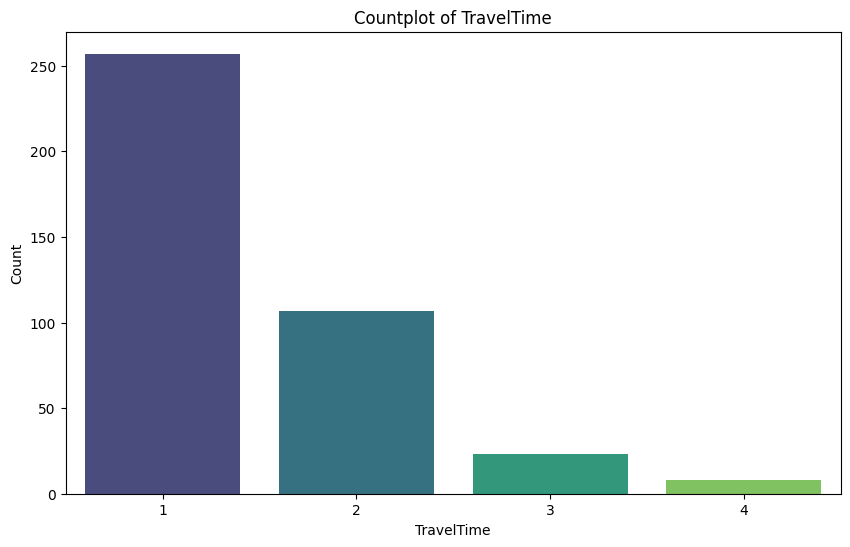

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


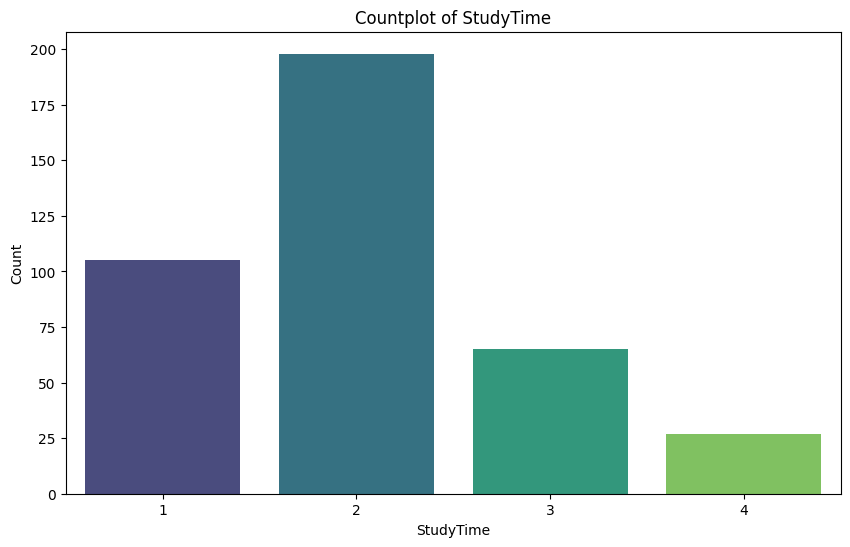

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


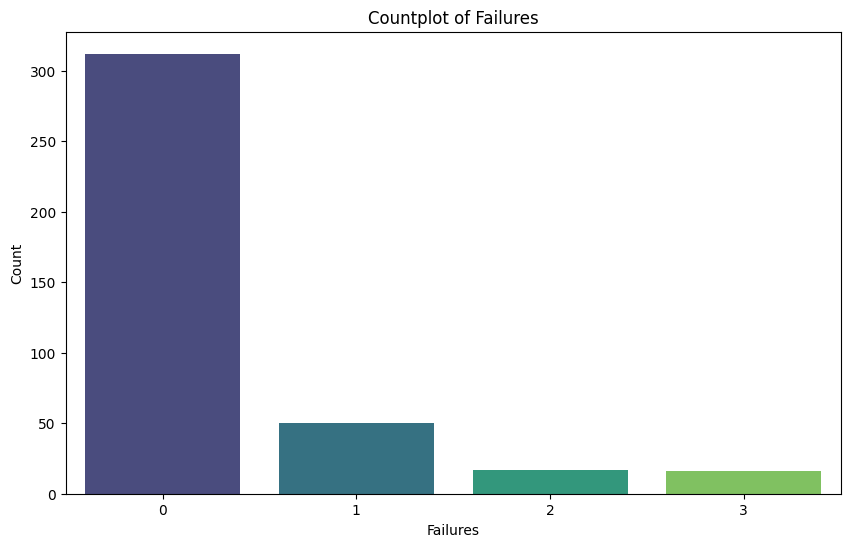

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


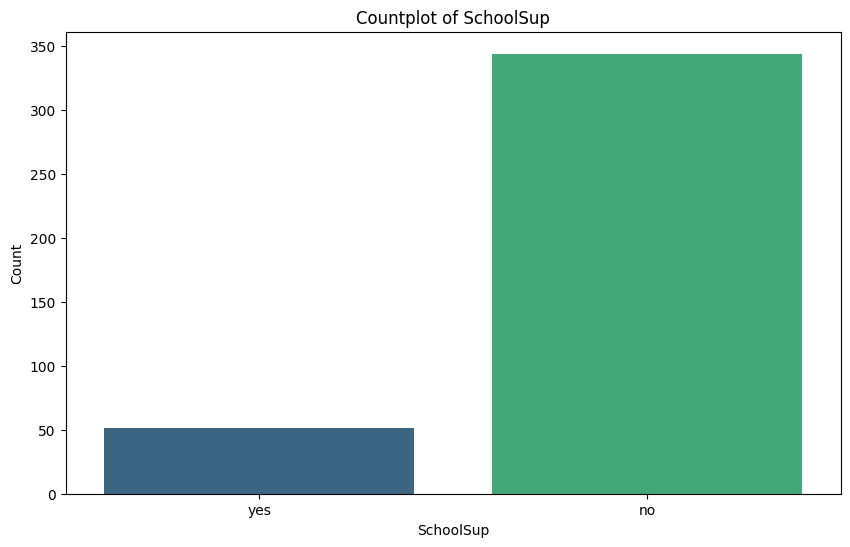

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


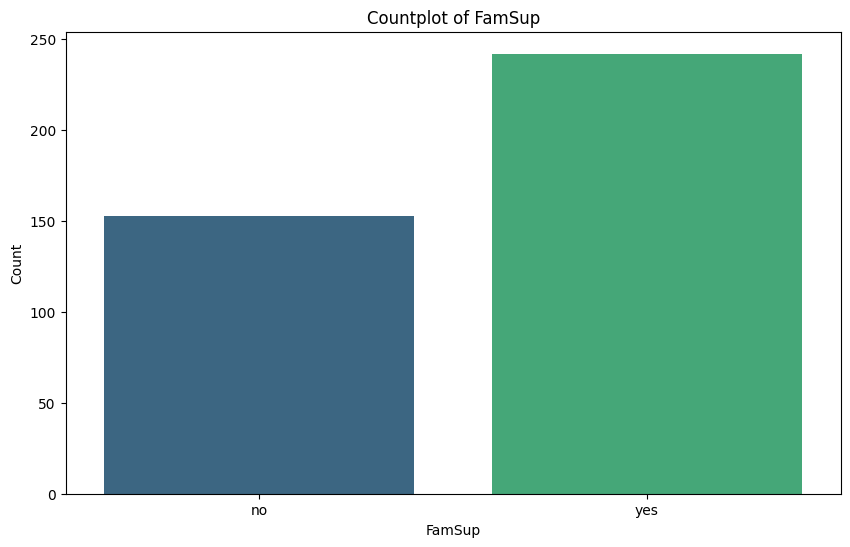

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


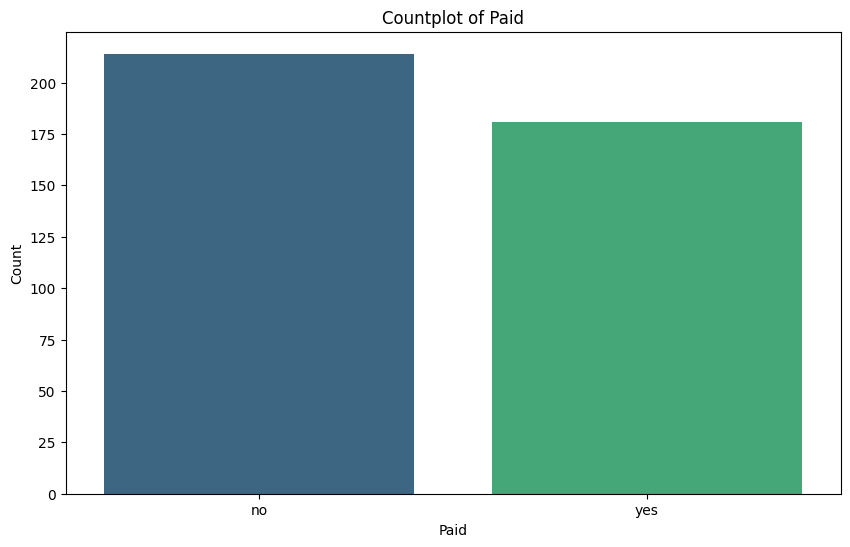

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


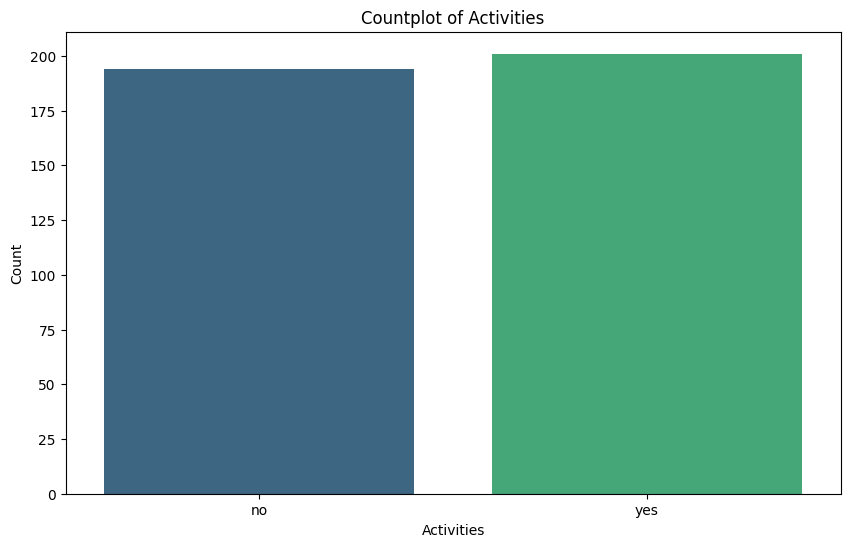

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


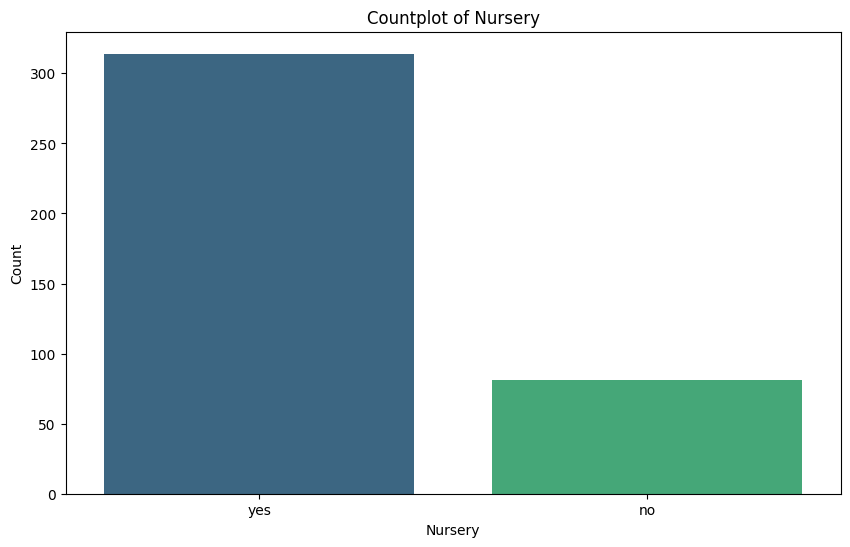

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


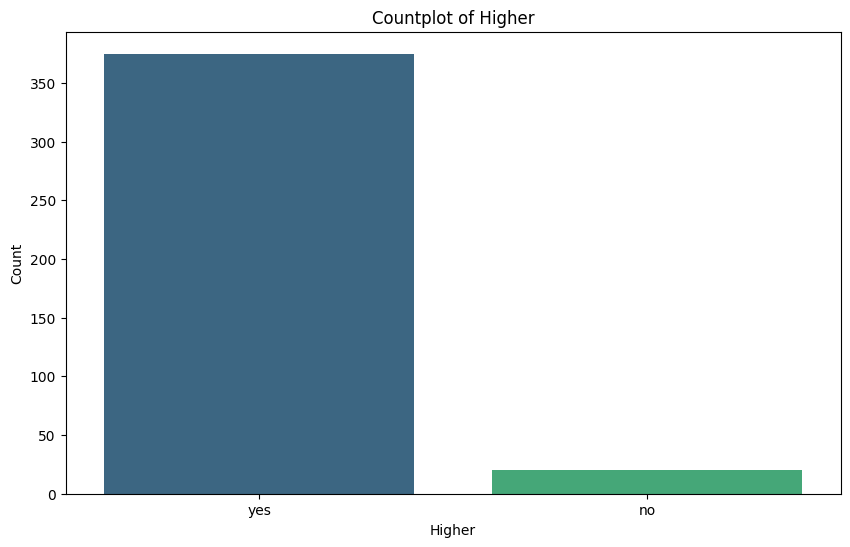

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


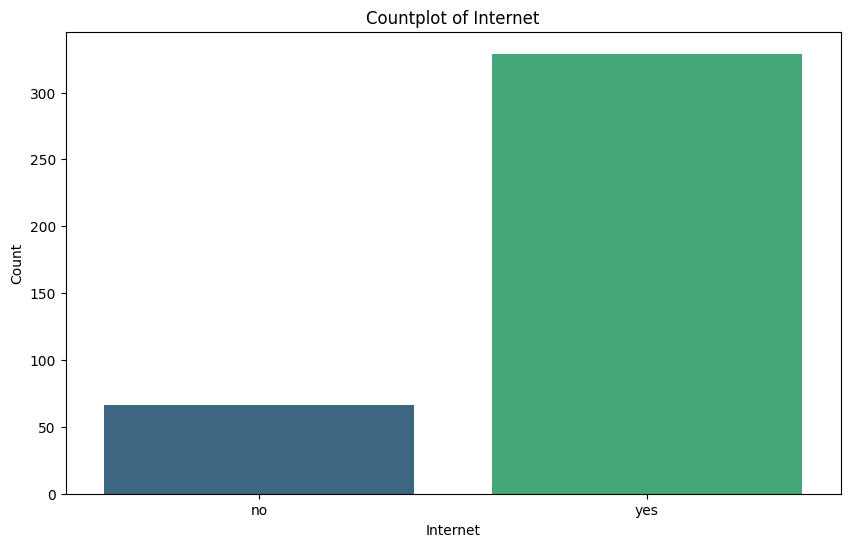

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


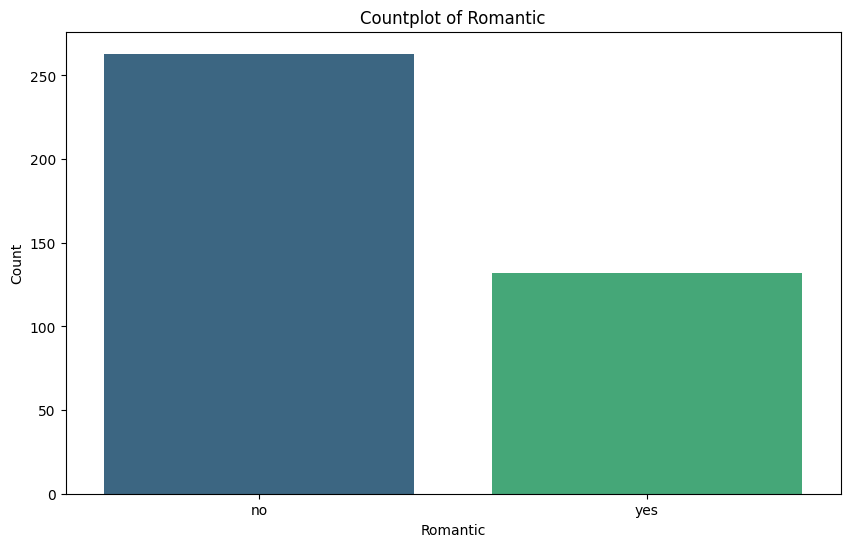

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


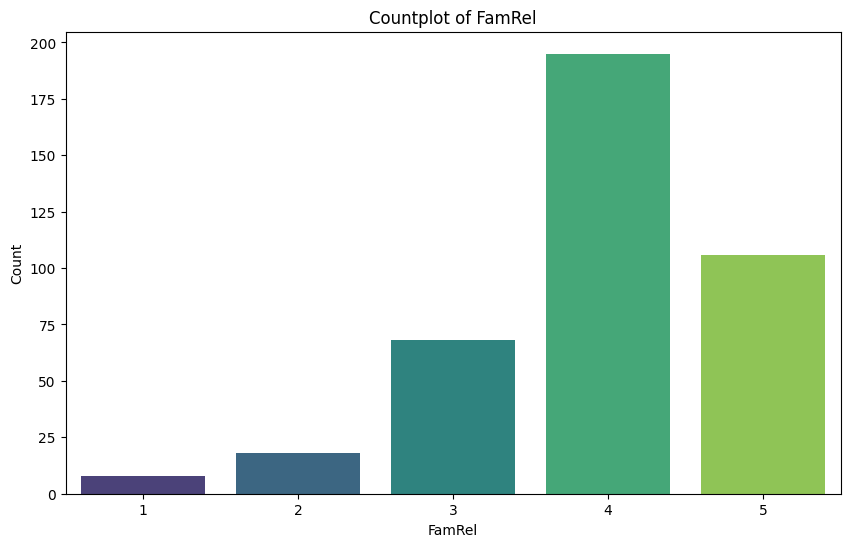

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


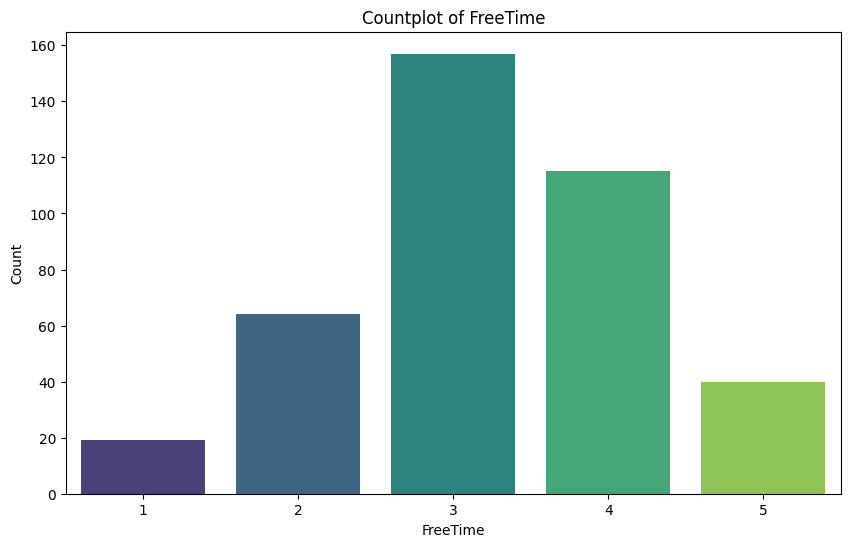

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


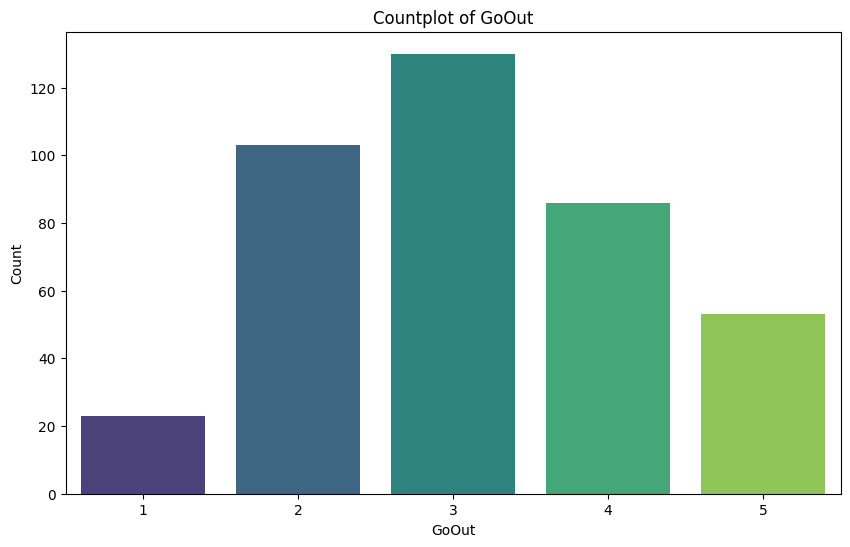

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


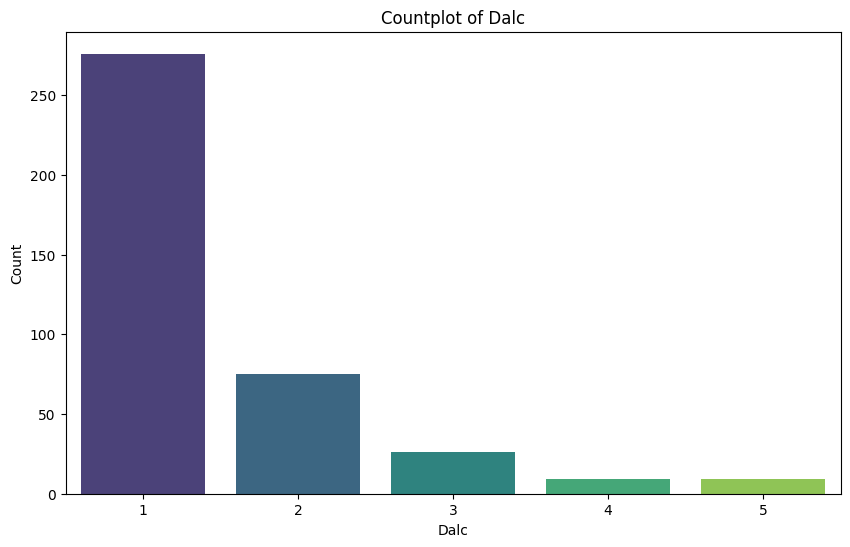

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


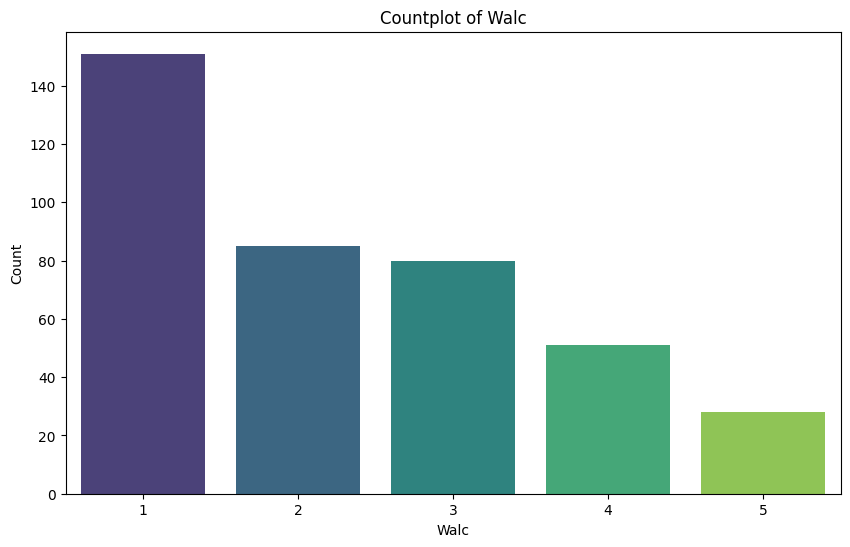

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


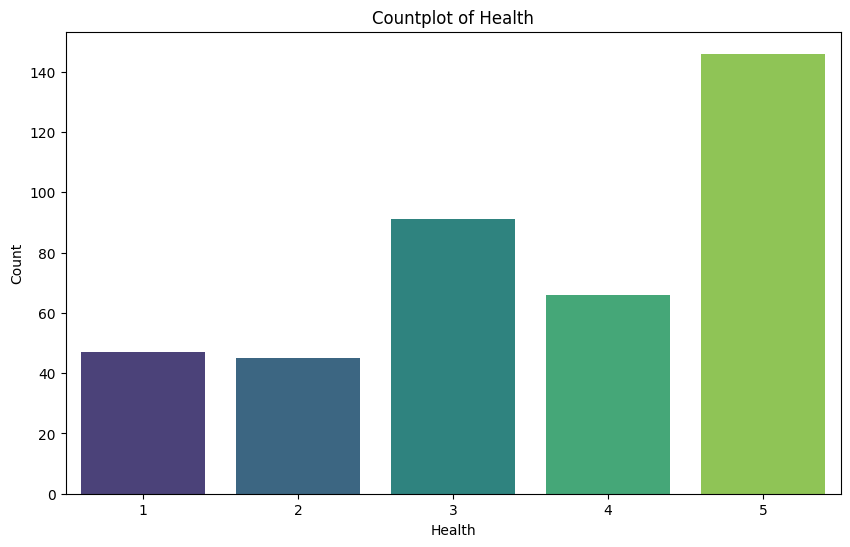

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


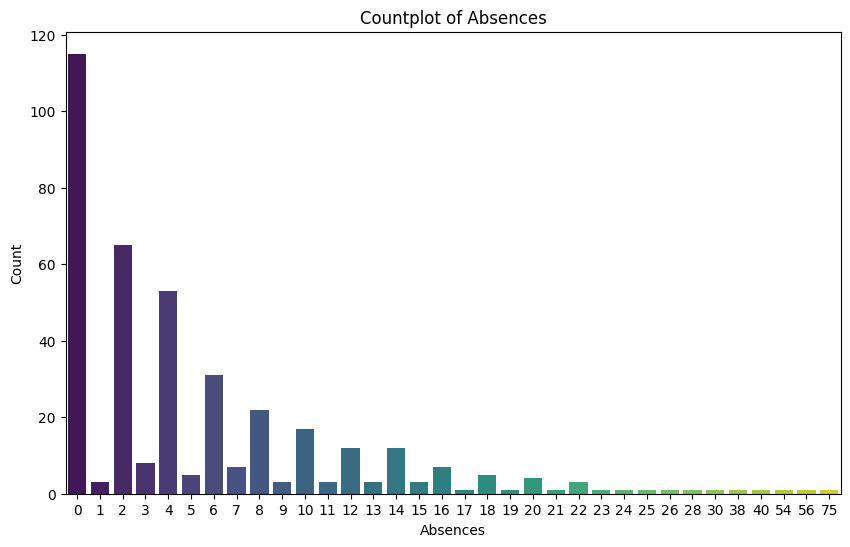

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


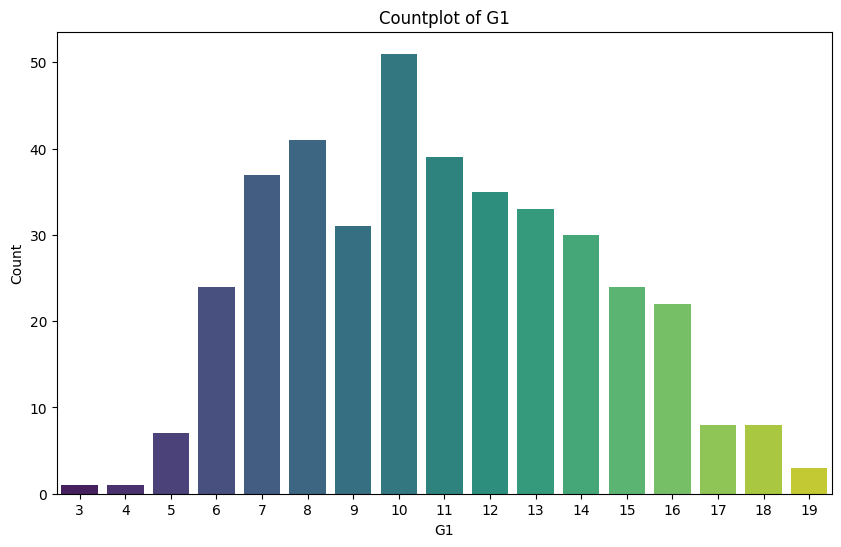

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


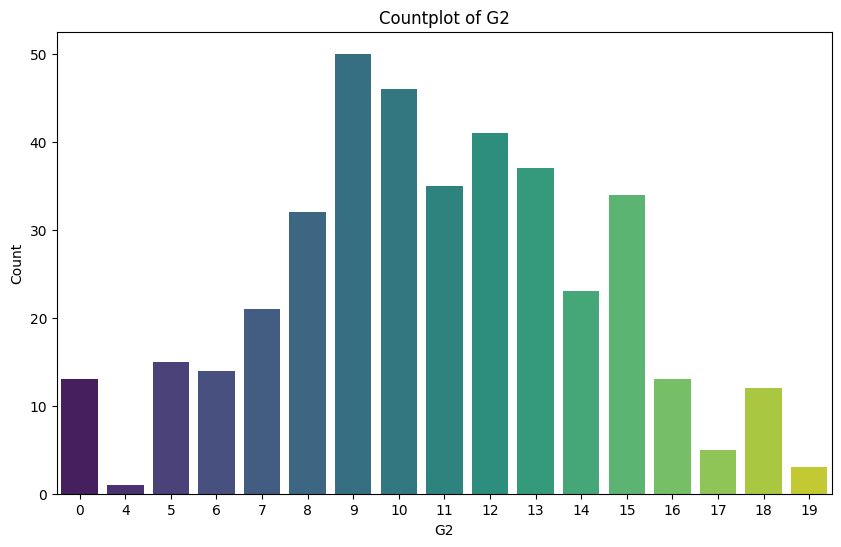

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\1231866811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


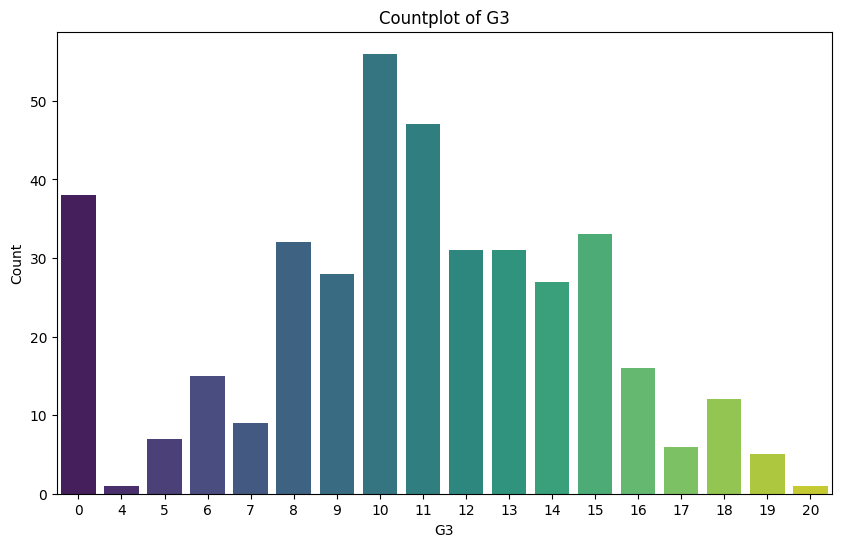

In [68]:
if __name__ == '__main__':
    # Plot distributions of numerical features
    plot_distributions(data)
    


In [69]:
# Convert non-numeric features to numeric
non_numeric_features = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for feature in non_numeric_features:
    data[feature] = label_encoder.fit_transform(data[feature])


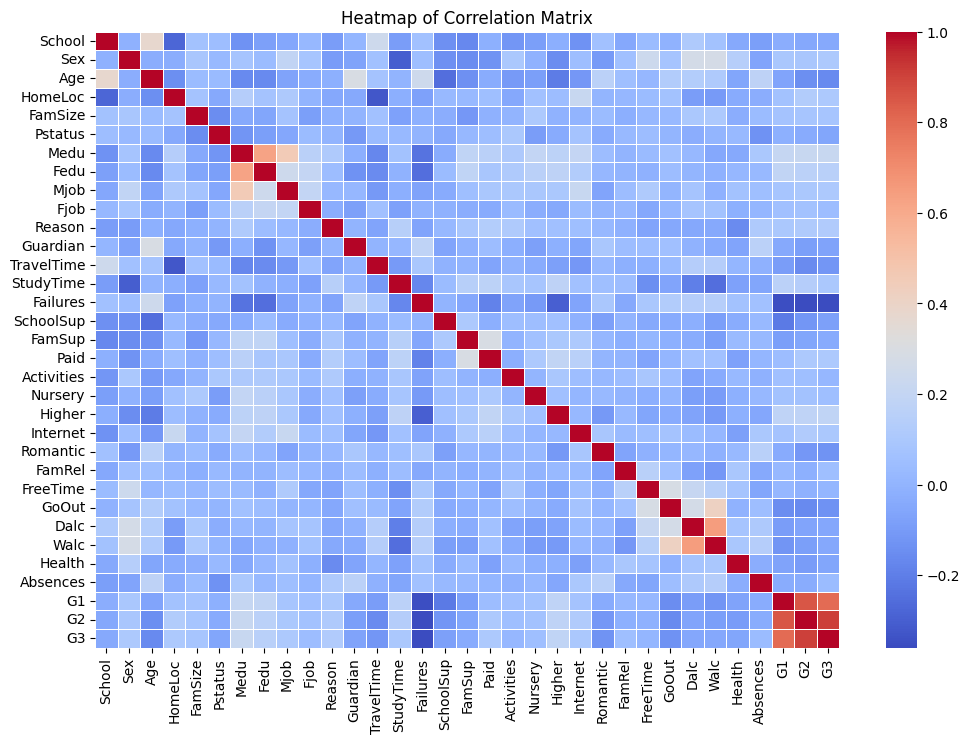

C:\Users\Zeyuan\AppData\Local\Temp\ipykernel_24936\2943331872.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette='viridis')


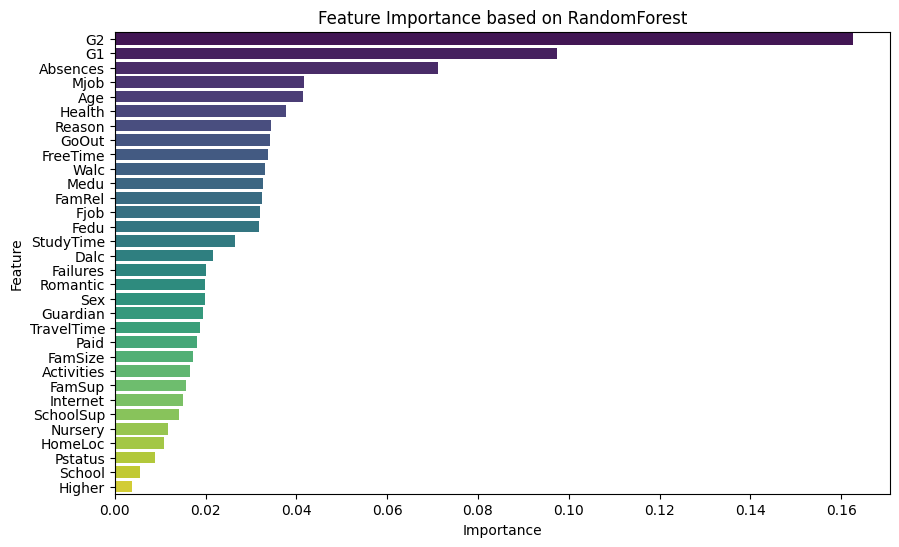

In [72]:
# Plot heatmap of correlation matrix
plot_heatmap(data)

# Plot feature importance
# Assuming the target column is named 'target' - replace with actual target column name
plot_feature_importance(data, target_column='G3')


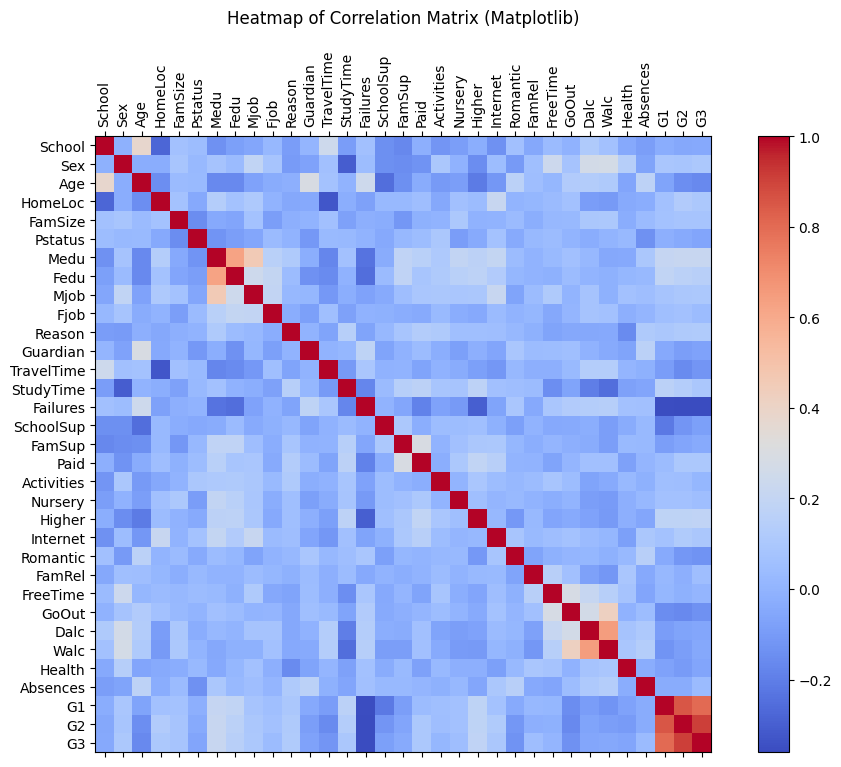

In [73]:
# Plot heatmap of correlation matrix using matplotlib
plot_heatmap_matplotlib(data)
    
